In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import seaborn as sn                   # For plotting graphs
import io
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
filepath2 = r"C:\Users\91623\OneDrive\Desktop\projects\spam_ham\spam.xlsx"
df= pd.read_excel(filepath2)
print(df)

     Column1                                            Column2
0        ham  Go until jurong point, crazy.. Available only ...
1        ham                      Ok lar... Joking wif u oni...
2       spam  Free entry in 2 a wkly comp to win FA Cup fina...
3        ham  U dun say so early hor... U c already then say...
4        ham  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5569    spam  This is the 2nd time we have tried 2 contact u...
5570     ham               Will ü b going to esplanade fr home?
5571     ham  Pity, * was in mood for that. So...any other s...
5572     ham  The guy did some bitching but I acted like i'd...
5573     ham                         Rofl. Its true to its name

[5574 rows x 2 columns]


In [3]:
df.isnull().sum()

Column1    0
Column2    0
dtype: int64

In [4]:
df= df.dropna()

In [5]:
df.head()

,Column1,Column2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.columns = df.columns.str.lower()

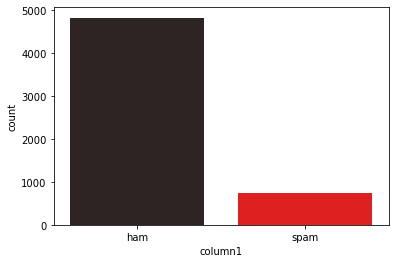

In [7]:
sns.countplot(df['column1'],palette='dark:r');

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
list1=['column1']
for i in list1:
    df[i]=le.fit_transform(df[i])

df.head()

,column1,column2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


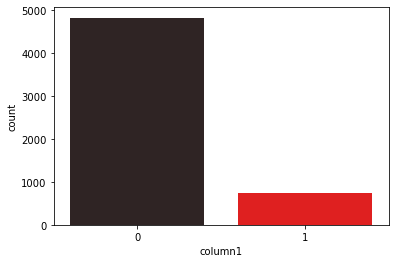

In [10]:
sns.countplot(df['column1'],palette='dark:r');

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   column1  5574 non-null   int32 
 1   column2  5574 non-null   object
dtypes: int32(1), object(1)
memory usage: 268.9+ KB


In [12]:
x=df['column2']

In [13]:
x.shape

(5574,)

In [14]:
y=df['column1']

#  making word bags

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
cv = CountVectorizer(lowercase = True ,ngram_range =(1,1))

In [17]:
x = cv.fit_transform(x)

In [18]:
x.shape

(5574, 8713)

#  Ml model

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.3,random_state=2529)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3901, 8713), (1673, 8713), (3901,), (1673,))

In [20]:
from sklearn.metrics import confusion_matrix ,classification_report

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[1468    0]
 [  41  164]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1468
           1       1.00      0.80      0.89       205

    accuracy                           0.98      1673
   macro avg       0.99      0.90      0.94      1673
weighted avg       0.98      0.98      0.97      1673



In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1462    6]
 [  32  173]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1468
           1       0.97      0.84      0.90       205

    accuracy                           0.98      1673
   macro avg       0.97      0.92      0.94      1673
weighted avg       0.98      0.98      0.98      1673



In [23]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf_pred=clf.predict(x_test)
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))

[[1444   24]
 [  29  176]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1468
           1       0.88      0.86      0.87       205

    accuracy                           0.97      1673
   macro avg       0.93      0.92      0.93      1673
weighted avg       0.97      0.97      0.97      1673



In [24]:
from sklearn.svm import SVC
svC=SVC()
svC.fit(x_train,y_train)
svC_pred=svC.predict(x_test)
from sklearn.metrics import confusion_matrix ,classification_report
print(confusion_matrix(y_test,svC_pred))
print(classification_report(y_test,svC_pred))

[[1467    1]
 [  34  171]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1468
           1       0.99      0.83      0.91       205

    accuracy                           0.98      1673
   macro avg       0.99      0.92      0.95      1673
weighted avg       0.98      0.98      0.98      1673



# random under sampling

In [25]:
from imblearn.under_sampling import RandomUnderSampler

In [26]:
rus = RandomUnderSampler(random_state=2529)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3901, 8713), (1673, 8713), (3901,), (1673,))

In [28]:
x_rus,y_rus = rus.fit_resample(x,y)

In [29]:
from sklearn.model_selection import train_test_split
xru_train,xru_test,yru_train,yru_test =train_test_split(x_rus,y_rus, test_size=0.3,random_state=2529)
xru_train.shape,xru_test.shape,yru_train.shape,yru_test.shape

((1045, 8713), (449, 8713), (1045,), (449,))

In [30]:
xru_train.shape,xru_test.shape,yru_train.shape,yru_test.shape

((1045, 8713), (449, 8713), (1045,), (449,))

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xru_train,yru_train)
rfc_pred1=rfc.predict(xru_test)
print(confusion_matrix(yru_test,rfc_pred1))
print(classification_report(yru_test,rfc_pred1))

[[206   1]
 [ 21 221]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       207
           1       1.00      0.91      0.95       242

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [32]:
from sklearn.svm import SVC
svC=SVC()
svC.fit(xru_train,yru_train)
svC_pred1=svC.predict(xru_test)
from sklearn.metrics import confusion_matrix ,classification_report
print(confusion_matrix(yru_test,svC_pred1))
print(classification_report(yru_test,svC_pred1))

[[200   7]
 [ 17 225]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       207
           1       0.97      0.93      0.95       242

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [33]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(xru_train,yru_train)
clf_pred1=clf.predict(xru_test)
print(confusion_matrix(yru_test,clf_pred1))
print(classification_report(yru_test,clf_pred1))

[[195  12]
 [ 21 221]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       207
           1       0.95      0.91      0.93       242

    accuracy                           0.93       449
   macro avg       0.93      0.93      0.93       449
weighted avg       0.93      0.93      0.93       449



In [34]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xru_train,yru_train)
y_pred1 = lr.predict(xru_test)
print(confusion_matrix(yru_test,y_pred1))
print(classification_report(yru_test,y_pred1))

[[205   2]
 [ 15 227]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       207
           1       0.99      0.94      0.96       242

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



# random over sampling

In [35]:
from imblearn.over_sampling import RandomOverSampler

In [36]:
ros = RandomOverSampler(random_state=2529)

In [37]:
x_ros,y_ros = rus.fit_resample(x,y)

In [38]:
from sklearn.model_selection import train_test_split
xro_train,xro_test,yro_train,yro_test =train_test_split(x_ros,y_ros, test_size=0.3,random_state=2529)
xro_train.shape,xro_test.shape,yro_train.shape,yro_test.shape

((1045, 8713), (449, 8713), (1045,), (449,))

In [39]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xro_train,yro_train)
y_pred2 = lr.predict(xro_test)
print(confusion_matrix(yro_test,y_pred2))
print(classification_report(yro_test,y_pred2))

[[205   2]
 [ 15 227]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       207
           1       0.99      0.94      0.96       242

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [40]:
from sklearn.svm import SVC
svC=SVC()
svC.fit(xro_train,yro_train)
svC_pred2=svC.predict(xro_test)
from sklearn.metrics import confusion_matrix ,classification_report
print(confusion_matrix(yro_test,svC_pred2))
print(classification_report(yro_test,svC_pred2))

[[200   7]
 [ 17 225]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       207
           1       0.97      0.93      0.95       242

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [41]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(xro_train,yro_train)
clf_pred2=clf.predict(xro_test)
print(confusion_matrix(yro_test,clf_pred2))
print(classification_report(yro_test,clf_pred2))

[[197  10]
 [ 23 219]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       207
           1       0.96      0.90      0.93       242

    accuracy                           0.93       449
   macro avg       0.93      0.93      0.93       449
weighted avg       0.93      0.93      0.93       449



In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xro_train,yro_train)
rfc_pred2=rfc.predict(xro_test)
print(confusion_matrix(yro_test,rfc_pred2))
print(classification_report(yro_test,rfc_pred2))

[[205   2]
 [ 29 213]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       207
           1       0.99      0.88      0.93       242

    accuracy                           0.93       449
   macro avg       0.93      0.94      0.93       449
weighted avg       0.94      0.93      0.93       449

